In [1]:
using Revise

In [2]:
using ColorSchemes
using Plots
using SignedDistanceFunctions

[ Info: Precompiling SignedDistanceFunctions [5d155b53-3349-4453-ad1f-ebdf13404c93]


In [20]:
# Rasterise all plot; should play more nicely with previewing in GitHub.
gr(; fmt=:png);

In [40]:
function plot_sdf(g::Geometry{2})
    xs = -7.0:0.02:7.0
    ys = -5.0:0.02:5.0
    
    # NOTE That this is indexed as (y, x).
    data = Matrix{Float64}(undef, (length(ys), length(xs)))
    
    @inbounds for (j, x) in enumerate(xs)
        for (i, y) in enumerate(ys)
            data[i, j] = signed_distance(g, (x, y))
        end
    end
    
    # Compute colour gradient changeover point.
    # This is trying to make "0" always align with white in our scale.
    minv, maxv = extrema(data)
    changeover_point = if minv >= 0
        # A very small number; it has to be greater than 0 for `cgrad` to work.
        changeover_point = 1e-5
    elseif maxv <= 0
        # Zero isn't bounded by our data range, at which point we give up.
        0.5
    else
        - minv / (maxv - minv)
    end
    colour_gradient = cgrad([:blue, :white, :red], [0, changeover_point, 1])
    
    return heatmap(xs, ys, data; aspect_ratio=:equal, color=colour_gradient)
end
;

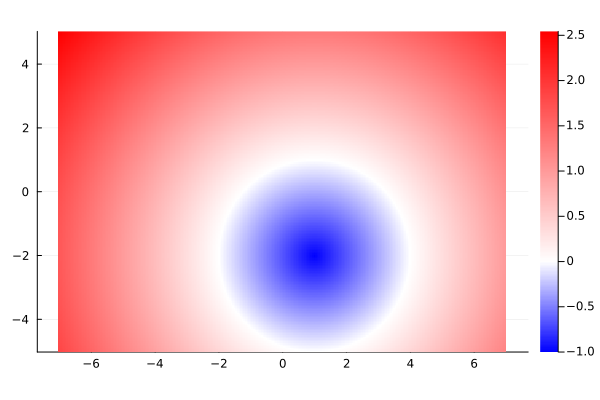

In [35]:
g = shift(scale(Sphere{2}(), 3.0), (1.0, -2.0))
plot_sdf(g)

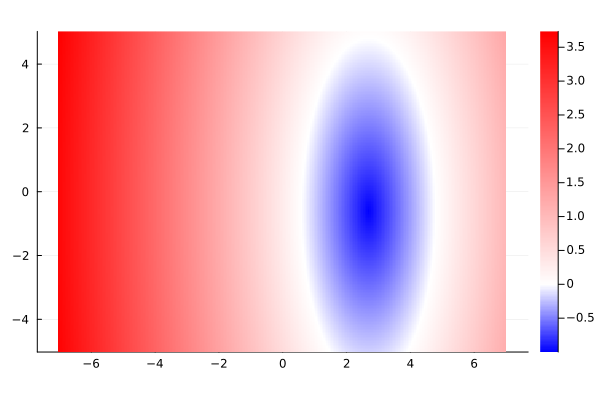

In [36]:
g2 = shift(scale(g, (0.7, 1.8)), (2.0, 3.0))
plot_sdf(g2)

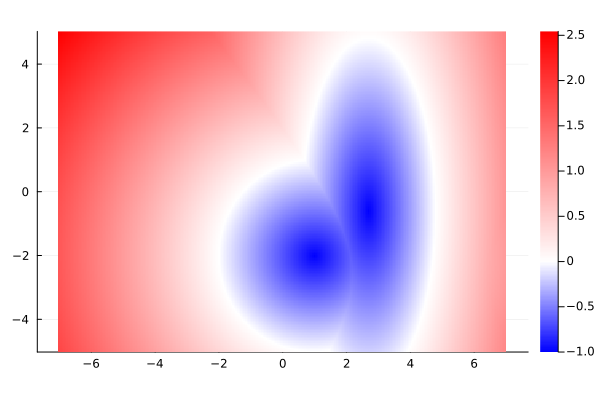

In [37]:
g3 = union(g, g2)
plot_sdf(g3)

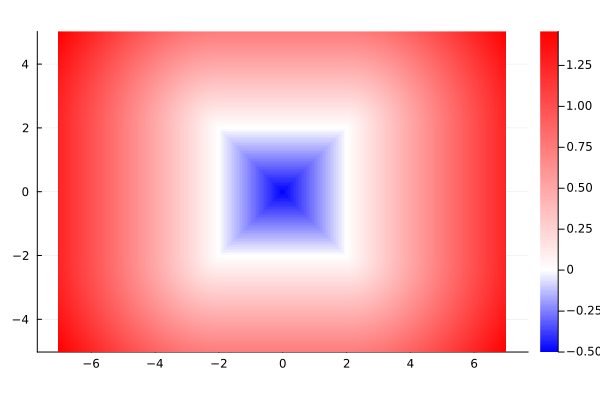

In [38]:
g4 = scale(Cube{2}(), 4.0)
plot_sdf(g4)

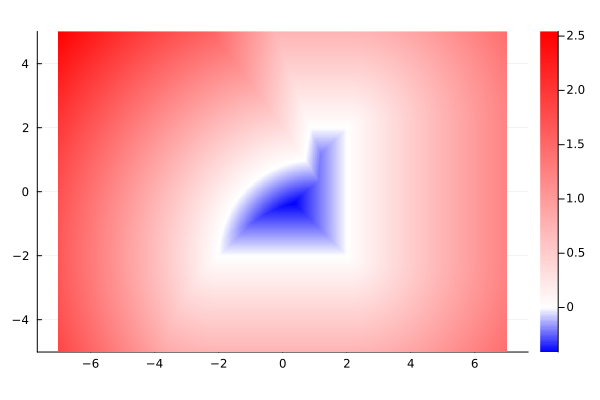

In [41]:
g5 = intersect(g3, g4)
plot_sdf(g5)

In [43]:
plot_sdf(g3 - g4)

LoadError: MethodError: no method matching -(::SignedDistanceFunctions.UnionGeometry{2}, ::SignedDistanceFunctions.IsotropicScale{2, Cube{2}})
[0mClosest candidates are:
[0m  -([91m::ChainRulesCore.AbstractThunk[39m, ::Any) at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_types/thunks.jl:34
[0m  -([91m::ChainRulesCore.NoTangent[39m, ::Any) at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_arithmetic.jl:61
[0m  -([91m::ChainRulesCore.NotImplemented[39m, ::Any) at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_arithmetic.jl:49
[0m  ...